In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import yaml
import shutil
from datetime import datetime

In [2]:
### All global variables that would be passed as arguments in a python script
# Do not think that I need them, after I have moved the load_cache and load_worker to the PostProcessing
#pipeline_txt_name = "pipelines.txt"
#cache_hits_misses_name = "cache_hits_and_misses.txt"

output_folder = "/home/nils/Downloads/output_plots"
input_folder = "/home/nils/Downloads/"
time_stamp = "1739886210"
worker_statistics_csv_name = f"worker_statistics_{time_stamp}.csv"
cache_statistics_csv_name = f"cache_statistics_{time_stamp}.csv"
worker_statistics_csv_path = os.path.join(input_folder, worker_statistics_csv_name)
cache_statistics_csv_path = os.path.join(input_folder, cache_statistics_csv_name)


# Remove the output_folder and then create it again
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
os.mkdir(output_folder)


# Set the seaborn style
sns.set(style="whitegrid")

In [3]:
# Converts a large number to a string 
def format_si_units(number):
    # Define SI unit prefixes
    si_prefixes = ['', 'K', 'M', 'G', 'T', 'P', 'E', 'Z', 'Y']

    # Handle zero as a special case
    if number == 0:
        return "0"

    # Determine the sign of the number
    sign = ''
    if number < 0:
        sign = '-'
        number = -number

    # Determine the order of magnitude
    order_of_magnitude = 0
    while number >= 1000 and order_of_magnitude < len(si_prefixes) - 1:
        number /= 1000.0
        order_of_magnitude += 1

    # Format the number to one decimal place and append the SI prefix
    formatted_number = f"{number:.3f}{si_prefixes[order_of_magnitude]}"

    # Add the sign back to the formatted number
    return sign + formatted_number


# Converting pipelines.txt to a dict of pipeline id to a title
def extract_pipeline_data(input_path):
    with open(input_path, 'r') as input_file:
        input_text = input_file.read()

    pipeline_dict = {}
    # Split the input text by the delimiter
    pipeline_sections = input_text.split("############################################")
    physical_pattern = re.compile(r"\bPhysical\w+")

    for section in pipeline_sections:
        # Find the pipeline ID in the section
        pipeline_match = re.search(r"Pipeline:\s*(\d+)", section)
        if pipeline_match:
            pipeline_id = int(pipeline_match.group(1))
            if pipeline_id not in pipeline_dict:
                pipeline_dict[pipeline_id] = []
            
            # Find all words starting with 'Physical' in the section
            physical_matches = physical_pattern.findall(section)
            cleaned_matches = [match.replace("Physical", "").replace("Operator", "").replace("Stream", "") for match in physical_matches]
            pipeline_dict[pipeline_id].extend(cleaned_matches)
    
    # Concatenate multiple values with "_"
    return {key: "_".join(values) for key, values in pipeline_dict.items()}

In [4]:
# Gathering all cache statistic files across all folders
def load_cache_statistics():
    return pd.read_csv(cache_statistics_csv_path)
    
# Converting query engine statistics to statistics csv
def load_worker_statistics():
    return pd.read_csv(worker_statistics_csv_path)

In [5]:
# Reading the combined data into dataframe named df and printing a little summary of the data frame
df = load_worker_statistics()
    
# General info
print("### DataFrame Summary ###\n")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
print("Columns and Data Types:")
print(df.dtypes, "\n")

# Number of unique values per column
print("Number of Unique Values per Column:")
print(df.nunique(), "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Descriptive statistics for numeric columns
print("Descriptive Statistics (Numeric Columns):")
print(df.describe().T, "\n")

# Display a sample of rows
print("Sample Rows:")
display(df.head(5))

### DataFrame Summary ###

Shape: 226448 rows, 23 columns

Columns and Data Types:
buffer_size_in_bytes                     int64
buffers_in_global_buffer_manager         int64
buffers_in_source_local_buffer_pool      int64
buffers_per_worker                       int64
lock_slice_cache                          bool
nautilus_backend                        object
numberOfEntriesSliceCache                int64
number_of_worker_threads                 int64
query                                   object
shuffle_strategy                        object
slice_cache_type                        object
slice_store_type                        object
task_queue_size                          int64
timestamp_increment                      int64
task_id                                  int64
start_time                              object
end_time                                object
duration                               float64
num_tuples                               int64
throughput              

,buffer_size_in_bytes,buffers_in_global_buffer_manager,buffers_in_source_local_buffer_pool,buffers_per_worker,lock_slice_cache,nautilus_backend,numberOfEntriesSliceCache,number_of_worker_threads,query,shuffle_strategy,...,timestamp_increment,task_id,start_time,end_time,duration,num_tuples,throughput,pipeline_id,start_time_normalized,end_time_normalized
0,8196,1000000,1000,12800,False,COMPILER,1,1,SELECT MIN(value) FROM tcp_source WINDOW SLIDI...,NONE,...,1,0,2025-02-18 13:34:01.593387095,2025-02-18 13:34:01.593408368,0.000021,256,1.219048e+07,5,0 days 00:00:00,0 days 00:00:00.000021273
1,8196,1000000,1000,12800,False,COMPILER,1,1,SELECT MIN(value) FROM tcp_source WINDOW SLIDI...,NONE,...,1,1,2025-02-18 13:34:01.593410290,2025-02-18 13:34:01.593419933,0.000009,256,2.844444e+07,4,0 days 00:00:00.000023195,0 days 00:00:00.000032838
2,8196,1000000,1000,12800,False,COMPILER,1,1,SELECT MIN(value) FROM tcp_source WINDOW SLIDI...,NONE,...,1,2,2025-02-18 13:34:01.593420673,2025-02-18 13:34:01.593428924,0.000008,256,3.200000e+07,3,0 days 00:00:00.000033578,0 days 00:00:00.000041829
3,8196,1000000,1000,12800,False,COMPILER,1,1,SELECT MIN(value) FROM tcp_source WINDOW SLIDI...,NONE,...,1,3,2025-02-18 13:34:01.593448583,2025-02-18 13:34:01.593451978,0.000003,256,8.533333e+07,5,0 days 00:00:00.000061488,0 days 00:00:00.000064883
4,8196,1000000,1000,12800,False,COMPILER,1,1,SELECT MIN(value) FROM tcp_source WINDOW SLIDI...,NONE,...,1,4,2025-02-18 13:34:01.593452631,2025-02-18 13:34:01.593458168,0.000005,256,5.120000e+07,4,0 days 00:00:00.000065536,0 days 00:00:00.000071073


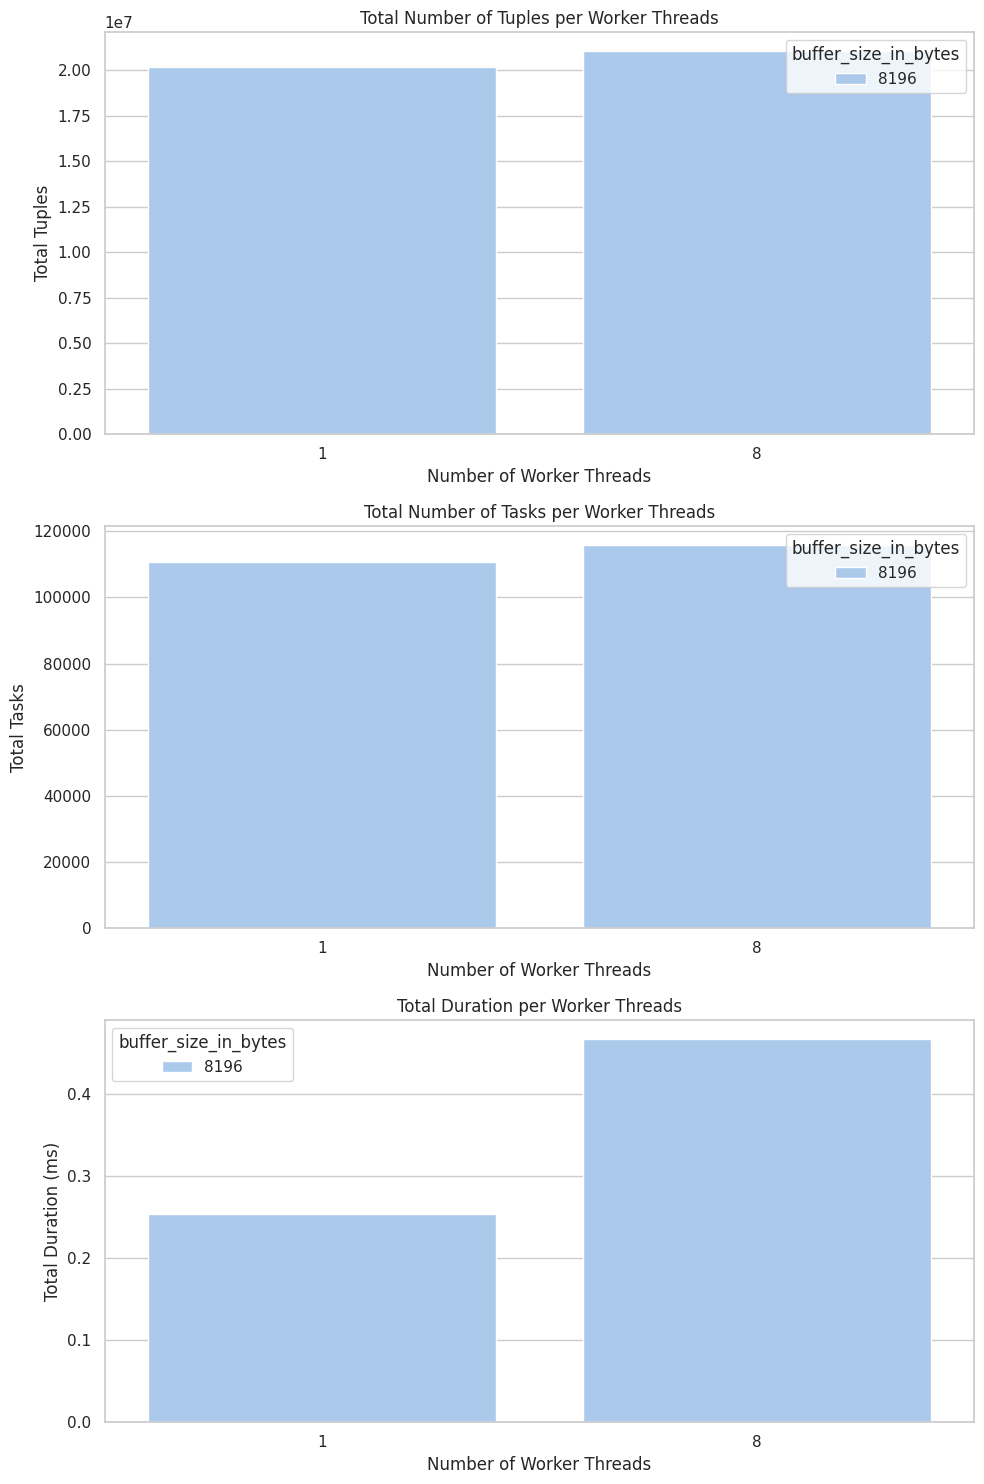

In [6]:
# Plotting the total no. tuples, no. tasks, total duration per no. worker threads
df = load_worker_statistics()
# Aggregate the data by number_of_worker_threads
aggregated_data = df.groupby(["number_of_worker_threads", "buffer_size_in_bytes"]).agg(
    total_tuples=('num_tuples', 'sum'),
    total_tasks=('task_id', 'count'),
    total_duration=('duration', 'sum')
).reset_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot total number of tuples
sns.barplot(
    data=aggregated_data,
    x="number_of_worker_threads",
    y="total_tuples",
    palette="pastel",
    hue="buffer_size_in_bytes",
    ax=axes[0]
)
axes[0].set_title("Total Number of Tuples per Worker Threads")
axes[0].set_xlabel("Number of Worker Threads")
axes[0].set_ylabel("Total Tuples")

# Plot total number of tasks
sns.barplot(
    data=aggregated_data,
    x="number_of_worker_threads",
    y="total_tasks",
    palette="pastel",
    hue="buffer_size_in_bytes",
    ax=axes[1]
)
axes[1].set_title("Total Number of Tasks per Worker Threads")
axes[1].set_xlabel("Number of Worker Threads")
axes[1].set_ylabel("Total Tasks")

# Plot total duration
sns.barplot(
    data=aggregated_data,
    x="number_of_worker_threads",
    y="total_duration",
    palette="pastel",
    hue="buffer_size_in_bytes",
    ax=axes[2]
)
axes[2].set_title("Total Duration per Worker Threads")
axes[2].set_xlabel("Number of Worker Threads")
axes[2].set_ylabel("Total Duration (ms)")

# Adjust layout
plt.tight_layout()
plt.show()
plt.close(fig)


/tmp/ipykernel_102772/470833985.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=True).agg({
/tmp/ipykernel_102772/470833985.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=False)['duration'].mean()


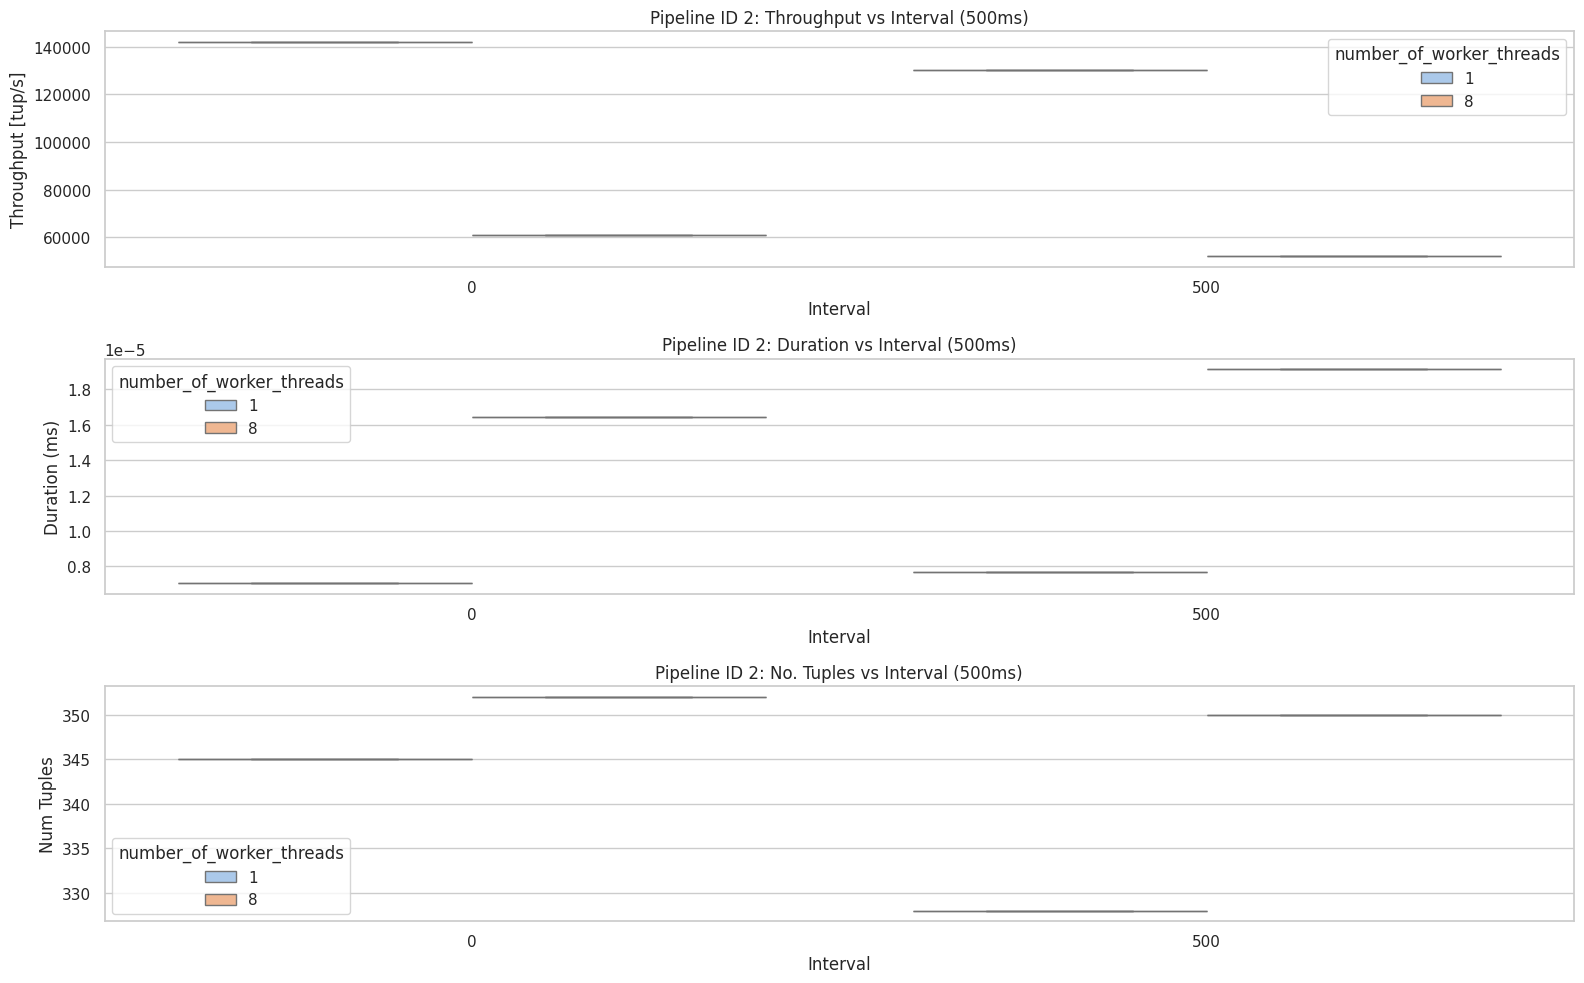

/tmp/ipykernel_102772/470833985.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=True).agg({
/tmp/ipykernel_102772/470833985.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=False)['duration'].mean()


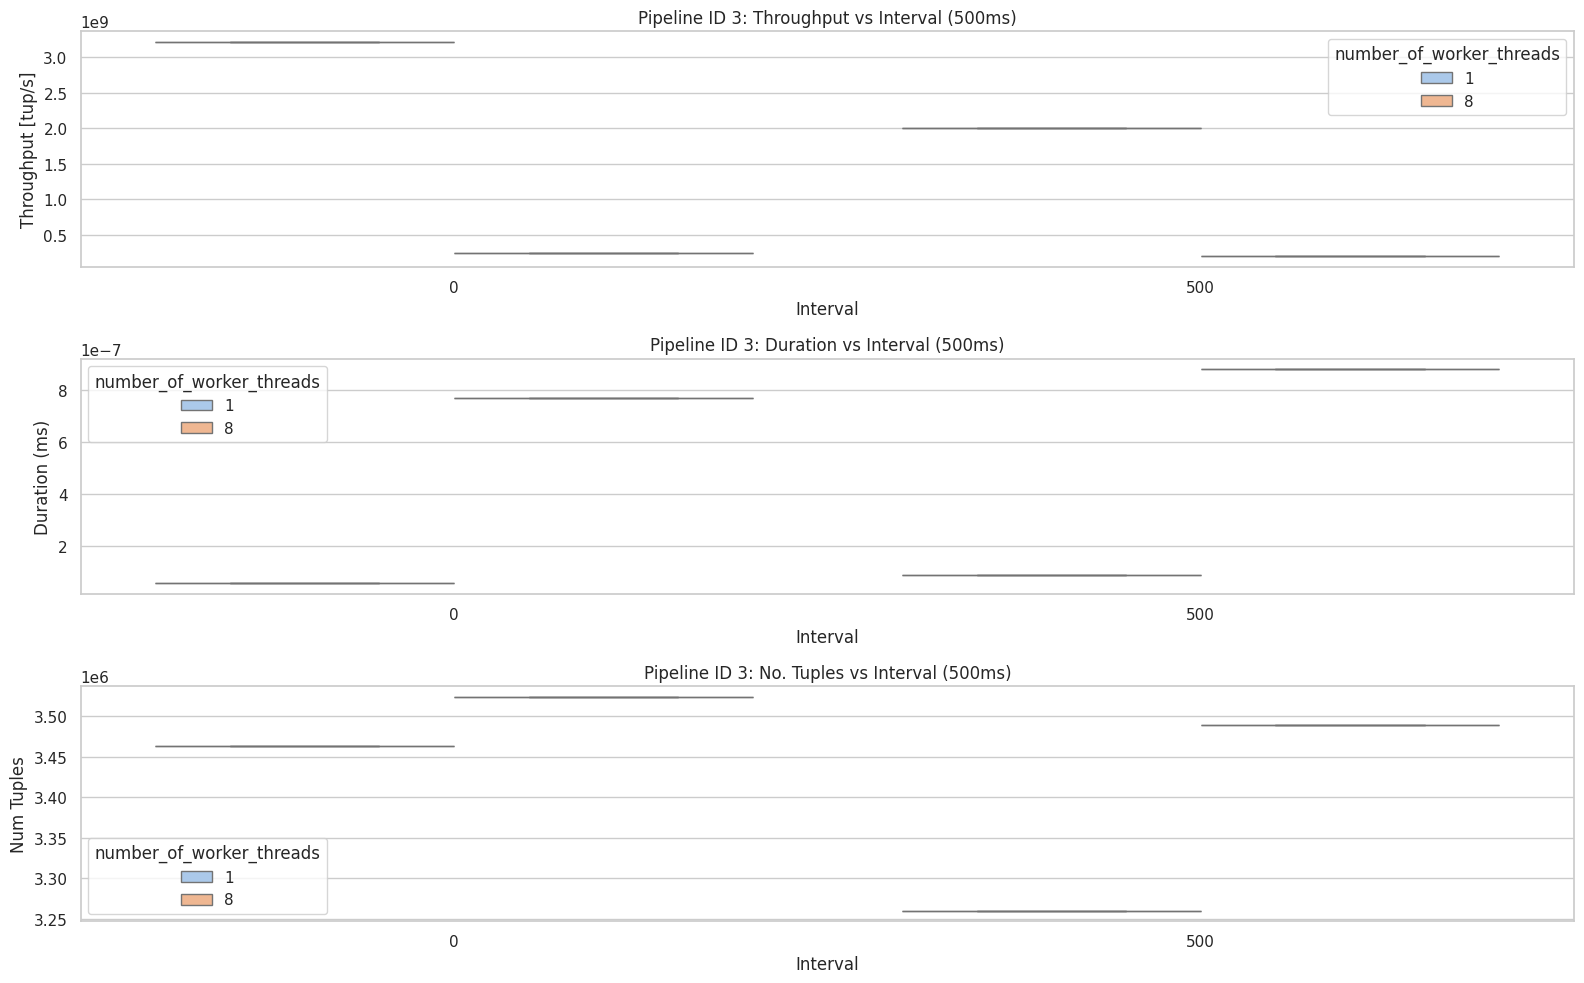

/tmp/ipykernel_102772/470833985.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=True).agg({
/tmp/ipykernel_102772/470833985.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=False)['duration'].mean()


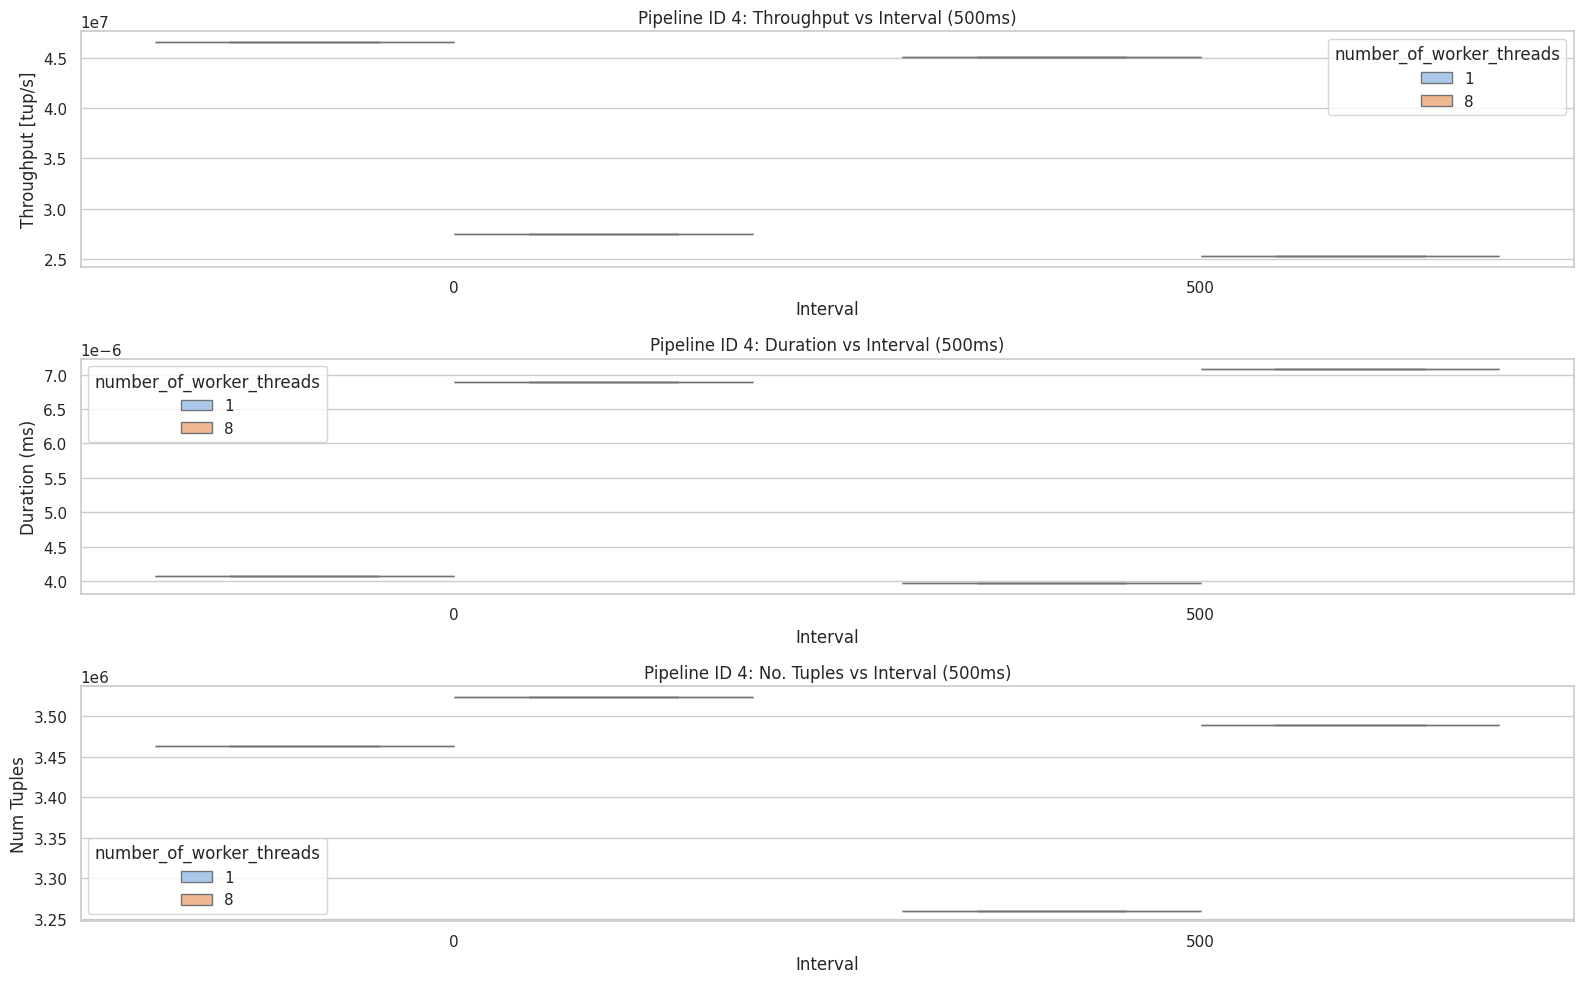

/tmp/ipykernel_102772/470833985.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=True).agg({
/tmp/ipykernel_102772/470833985.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=False)['duration'].mean()


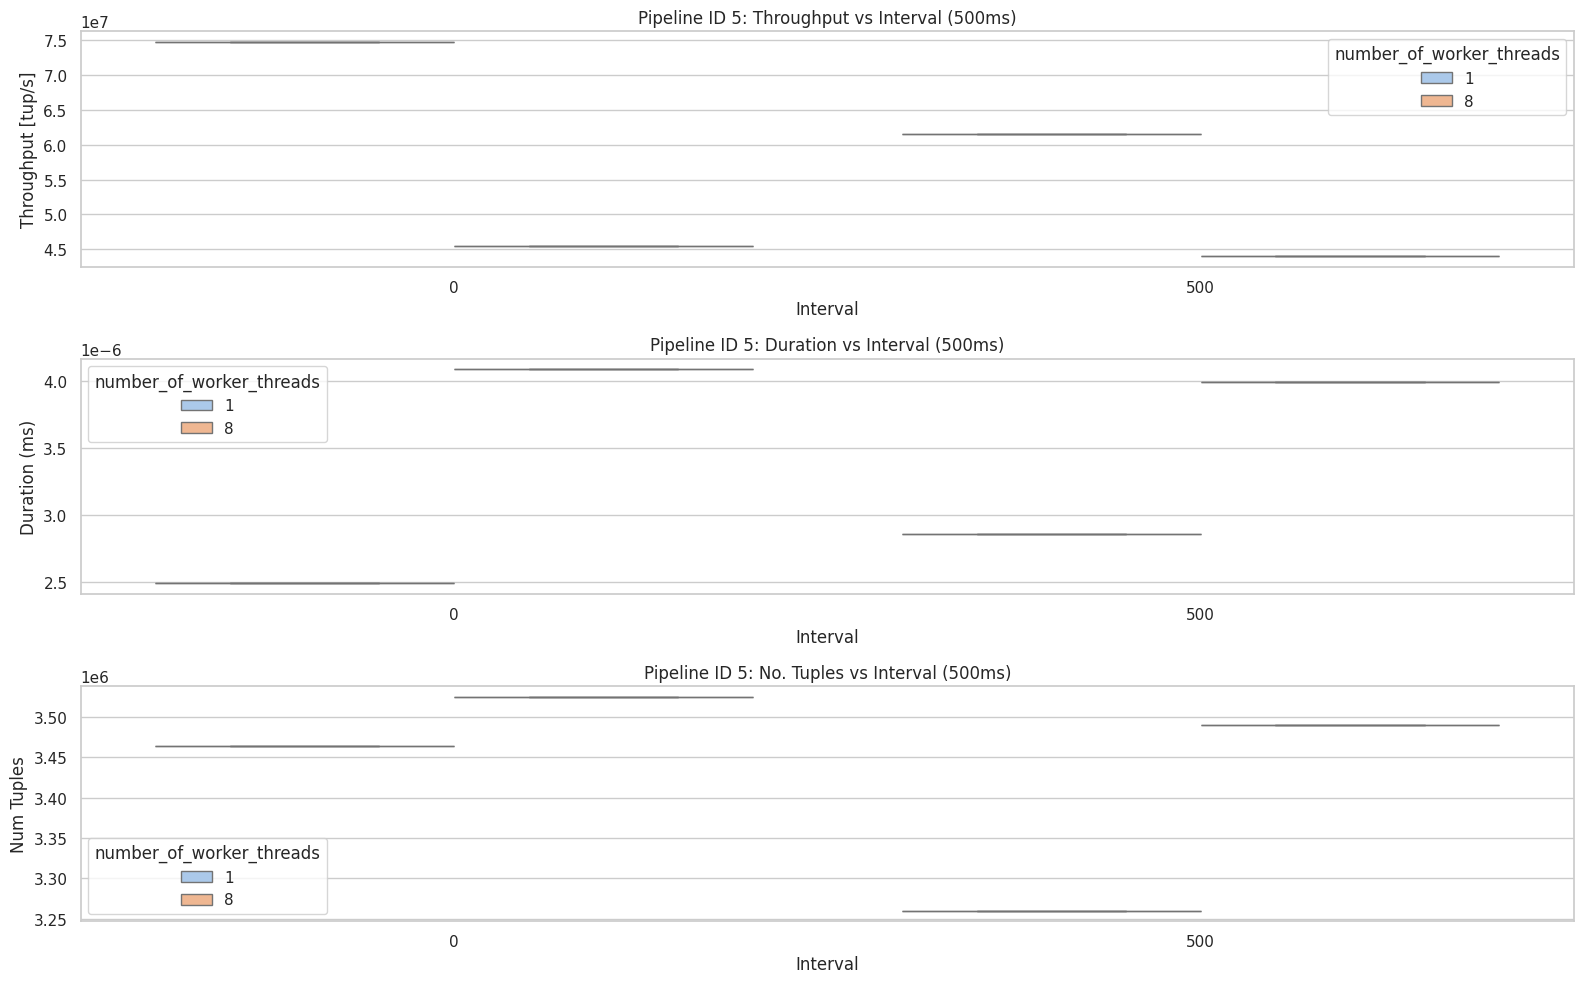

In [7]:
# Plotting the throughput and duration for each pipeline in intervals
# Only do this for buffer_size_in_bytes == 8196
df = load_worker_statistics()
df = df[df['buffer_size_in_bytes'] == 8196]

# Normalize the timestamps to timedelta and milliseconds
df['start_time_normalized'] = pd.to_timedelta(df['start_time_normalized'])
df['start_time_normalized_ms'] = df['start_time_normalized'].dt.total_seconds() * 1000
df['end_time_normalized'] = pd.to_timedelta(df['end_time_normalized'])

# Create intervals
interval_size_in_ms = 500
intervals = pd.cut(df['start_time_normalized_ms'], bins=range(0, int(df['start_time_normalized_ms'].max()) + interval_size_in_ms, interval_size_in_ms), right=False)
df['interval'] = intervals
df['interval'] = df['interval'].apply(lambda x: x.left)

# Group by pipeline_id and create a plot for each group
interesting_pipeline_ids = df["pipeline_id"].unique()
df = df[df['pipeline_id'].isin(interesting_pipeline_ids)]
for pipeline_id, group in df.groupby("pipeline_id"):
    # Select only the necessary columns for computation
    group = group[['interval', 'number_of_worker_threads', 'throughput', 'duration', 'num_tuples']]
    
    sum_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=True).agg({
        'num_tuples': 'sum',
        'duration': 'sum',
    })
    # Calculate throughput as sum(num_tuples) / sum(duration)
    sum_group['throughput'] = sum_group['num_tuples'] / sum_group['duration']

    # Calculate the average duration
    avg_group = group.groupby(['interval', 'number_of_worker_threads'], as_index=False)['duration'].mean()

    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(16, 10))
    
    # Plot throughput vs interval
    sns.boxplot(
        data=sum_group,
        x="interval",
        y="throughput",
    palette="pastel",
        hue="number_of_worker_threads",
        ax=axes[0]
    )
    axes[0].set_title(f"Pipeline ID {pipeline_id}: Throughput vs Interval ({interval_size_in_ms}ms)")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Throughput [tup/s]")

    # Plot duration vs interval
    sns.boxplot(
        data=avg_group,
        x="interval",
        y="duration",
    palette="pastel",
        hue="number_of_worker_threads",
        ax=axes[1]
    )
    axes[1].set_title(f"Pipeline ID {pipeline_id}: Duration vs Interval ({interval_size_in_ms}ms)")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Duration (ms)")

    # Plot no. tuples vs interval
    sns.boxplot(
        data=sum_group,
        x="interval",
        y="num_tuples",
    palette="pastel",
        hue="number_of_worker_threads",
        ax=axes[2]
    )
    axes[2].set_title(f"Pipeline ID {pipeline_id}: No. Tuples vs Interval ({interval_size_in_ms}ms)")
    axes[2].set_xlabel("Interval")
    axes[2].set_ylabel("Num Tuples")

    # Adjust layout and save the figure
    plt.tight_layout()
    figure_path = os.path.join(output_folder, f"pipeline_{pipeline_id}_intervals_{interval_size_in_ms}ms.png")
    plt.savefig(figure_path)
    plt.show()
    plt.close(fig)  # Close the figure to free memory



In [8]:
%%script true

#Plotting duration and throughput as a lineplot over the start_time_normalized
# Unique pipeline IDs
df = load_worker_statistics()
unique_pipeline_ids = df['pipeline_id'].unique()

# Generate one plot per pipeline
for pipeline_id in unique_pipeline_ids:
    # Filter data for the current pipeline_id
    pipeline_data = df[df['pipeline_id'] == pipeline_id]
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot throughput
    sns.lineplot(
        data=pipeline_data,
        x='start_time_normalized',
        y='throughput',
    palette="pastel",
        hue='buffer_size_in_bytes',
        marker="o",
        ax=axes[0]
    )
    axes[0].set_title(f"Pipeline ID {pipeline_id}: Throughput vs Time")
    axes[0].set_xlabel("Start Time")
    axes[0].set_ylabel("Throughput")
    
    # Plot duration
    sns.lineplot(
        data=pipeline_data,
        x='start_time_normalized',
        y='duration',
    palette="pastel",
        hue='buffer_size_in_bytes',
        marker="o",
        ax=axes[1]
    )
    axes[1].set_title(f"Pipeline ID {pipeline_id}: Duration vs Time")
    axes[1].set_xlabel("Start Time")
    axes[1].set_ylabel("Duration")
    
    # Adjust layout for readability
    plt.tight_layout()
    
    # Save the figure
    figure_path = os.path.join(output_folder, f"pipeline_{pipeline_id}.png")
    #plt.savefig(figure_path)
    plt.show()
    plt.close(fig)  # Close the figure to save memory

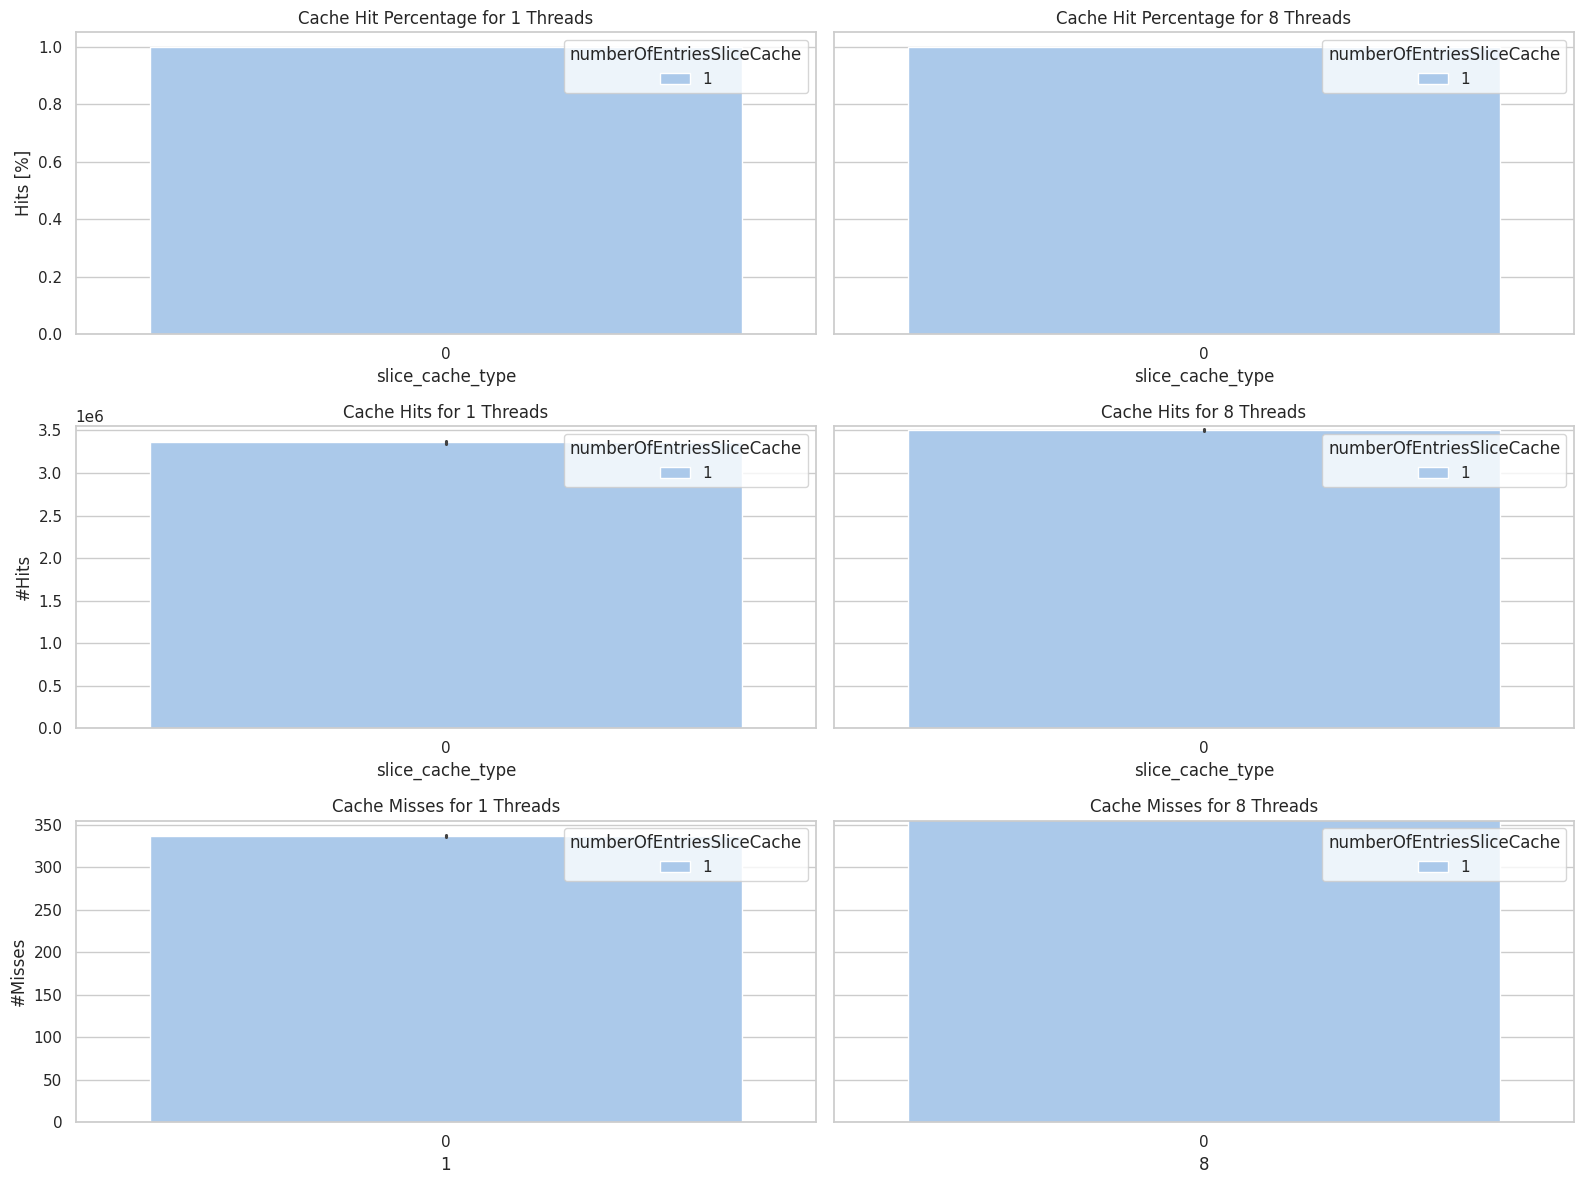

In [9]:
# Plotting the number of hits and misses per cache type
cache_stats_combined_df = load_cache_statistics()
interesting_param = "number_of_worker_threads"
x_param="slice_cache_type"
hue = "numberOfEntriesSliceCache"
y_params = ["hit_percentage", "hits_total", "misses_total"]
cache_stats_combined_df["hit_percentage"] = cache_stats_combined_df["hits_total"] / (cache_stats_combined_df["hits_total"] + 
                                                                                     cache_stats_combined_df["misses_total"])

# Create a subplot grid.
unique_params = cache_stats_combined_df[interesting_param].unique()
n_params = len(unique_params)
fig, axes = plt.subplots(3, n_params, figsize=(16, 12), squeeze=False, sharey='row')
for idx, param in enumerate(unique_params):
    subset = cache_stats_combined_df[cache_stats_combined_df[interesting_param] == param]

    ax = axes[0][idx]
    sns.barplot(x=x_param, y=y_params[0], hue=hue, data=subset, ax=ax, palette="pastel")
    ax.set_title(f"Cache Hit Percentage for {param} Threads")
    ax.set_xlabel(x_param)
    ax.set_ylabel(f"Hits [%]")
    ax.set_ylim(bottom=0)

    ax = axes[1][idx]
    sns.barplot(x=x_param, y=y_params[1], hue=hue, data=subset, ax=ax, palette="pastel",)
    ax.set_title(f"Cache Hits for {param} Threads")
    ax.set_xlabel(x_param)
    ax.set_ylabel(f"#Hits")
    ax.set_ylim(bottom=0)

    ax = axes[2][idx]
    sns.barplot(x=x_param, y=y_params[2], hue=hue, data=subset, ax=ax, palette="pastel")
    ax.set_title(f"Cache Misses for {param} Threads")
    ax.set_xlabel(param)
    ax.set_ylabel(f"#Misses")
    #ax.set_yscale('log')
    ax.set_ylim(bottom=0)


plt.tight_layout()
#plt.savefig(os.path.join(output_folder_plots, f"plots.png"))
plt.show()
plt.close()

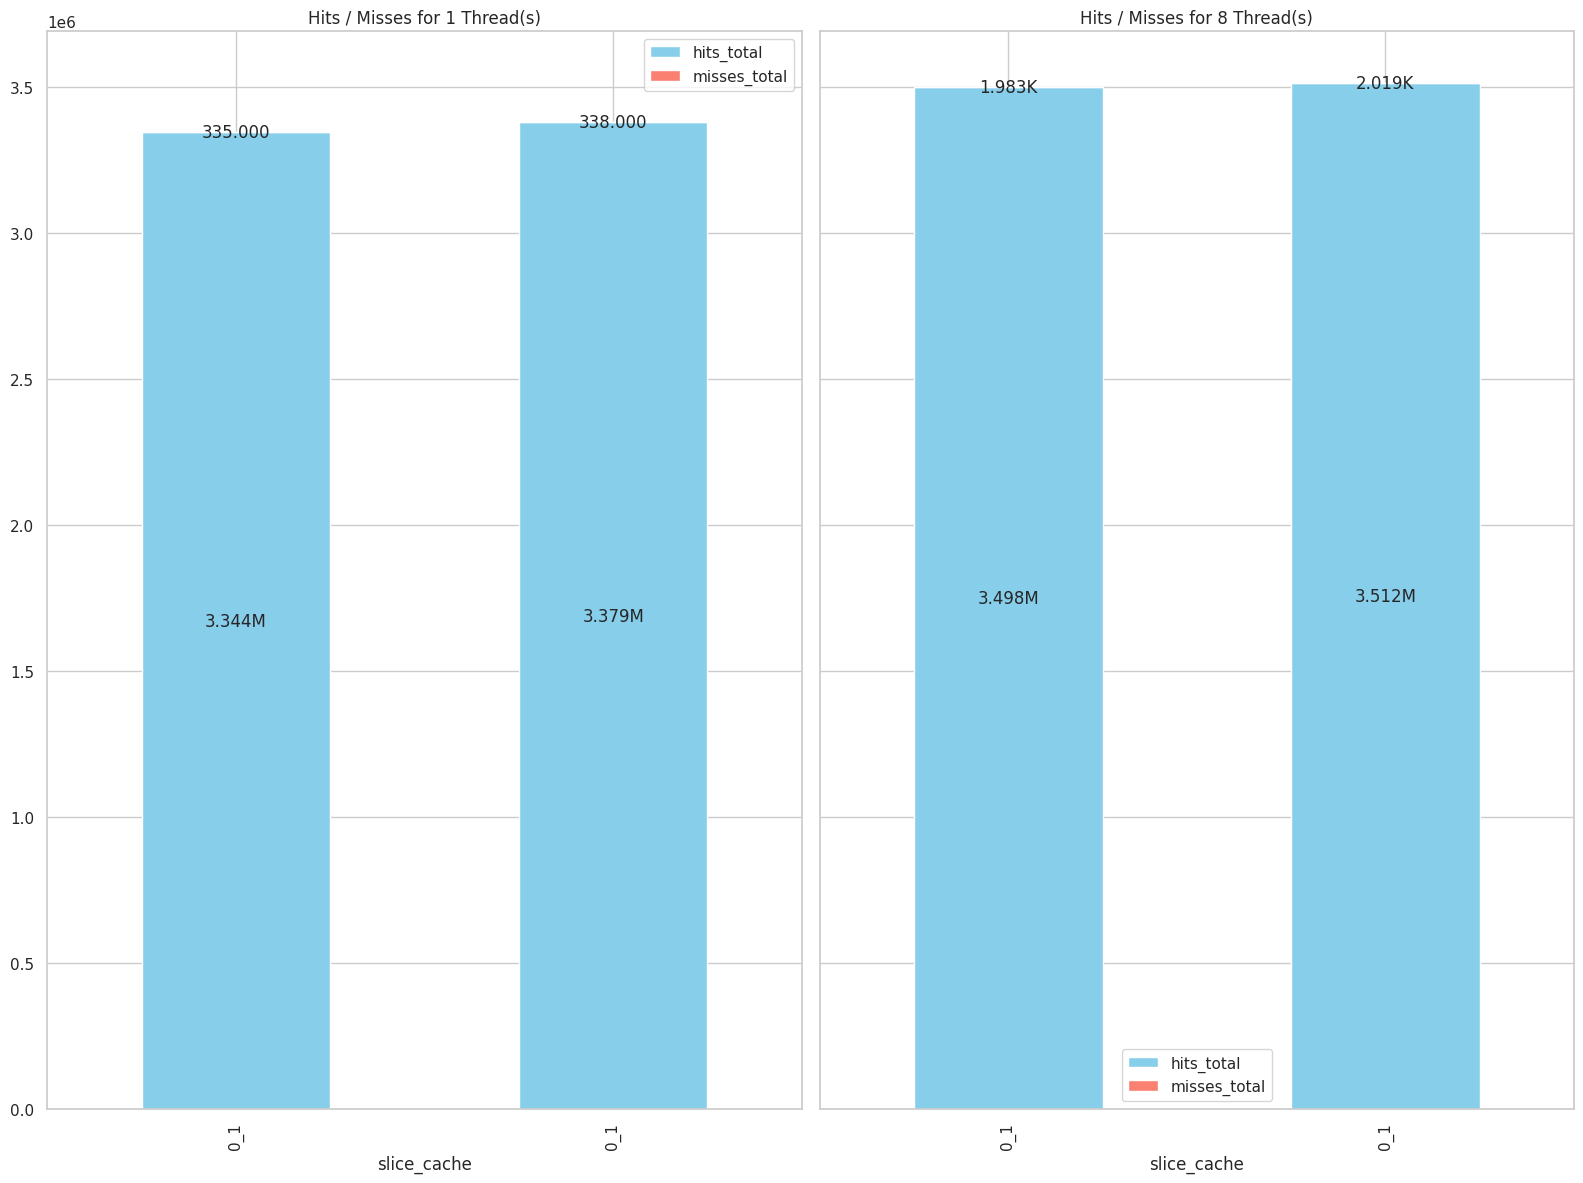

In [10]:
# Plotting the number of hits and misses per cache type
cache_stats_combined_df = load_cache_statistics()
interesting_param = "number_of_worker_threads"
x_param="slice_cache"
hue = "numberOfEntriesSliceCache"
y_params = ["hit_percentage", "hits_total", "misses_total"]
cache_stats_combined_df["hit_percentage"] = cache_stats_combined_df["hits_total"] / (cache_stats_combined_df["hits_total"] + 
                                                                                     cache_stats_combined_df["misses_total"])



# Create a subplot grid.
unique_params = cache_stats_combined_df[interesting_param].unique()
n_params = len(unique_params)
fig, axes = plt.subplots(1, n_params, figsize=(16, 12), squeeze=False, sharey='row')
for idx, param in enumerate(unique_params):
    subset = cache_stats_combined_df[cache_stats_combined_df[interesting_param] == param]
    plot_data = subset[["hits_total", "misses_total"]]
    plot_data.set_index(subset[x_param], inplace=True)
    ax = axes[0][idx]
    
    plot_data.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon']) #, logy=True)
    ax.set_title(f"Hits / Misses for {param} Thread(s)")
    #ax.set_ylim(bottom=0.1)
    
    
    # Annotate the bars with hits and misses values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        height_str = format_si_units(height)
        ax.text(x + width / 2, y + height / 2, f'{height_str}', horizontalalignment='center', verticalalignment='center')


plt.tight_layout()
#plt.savefig(os.path.join(output_folder_plots, f"plots.png"))
plt.show()
plt.close()